# Small things to apply machine Learning efficiently

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

tf.autograph.set_verbosity(0)
tf.keras.backend.set_floatx('float64')

import logging
logging.getLogger("tensoflow").setLevel(logging.ERROR)

## Evaluating a learning Algorithm (Polynomial Regression)  
- Here we will get to know that what is difference between different models.
- We will get to know how can we differentiate between them.
- Understand which model has the problem of Overfiting(High variance) and which model has the problem of Underfitting(High bias).
- How to overcome this problems.

In [2]:
def gen_data(m, seed=1, scale=0.7):
    """ generate a data set based on a x^2 with added noise """
    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)
    y_ideal = x_train**2 + c
    y_train = y_ideal + scale * y_ideal*(np.random.sample((m,))-0.5)
    x_ideal = x_train #for redraw when new data included in X
    return x_train, y_train, x_ideal, y_ideal

In [3]:
# Generate some data
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)
print(f"The shape of X_train is: {X.shape}, and of y_train is: {y.shape}")

The shape of X_train is: (18,), and of y_train is: (18,)


The y_ideal here is the ideal values which should be predicted by the model

#### Using train_test_split() method from the sklearn divide the data into 12 examples as the trainging data while 6 examples as the testing data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of y_train: {y_train.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of X_train: (12,)
The shape of X_test: (6,)
The shape of y_train: (12,)
The shape of y_test: (6,)


### Plot the values of the trainging dataset and testing dataset 

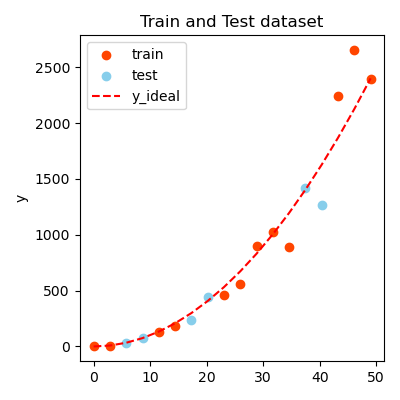

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(X_train, y_train, c="orangered", label="train")
ax.scatter(X_test, y_test, c="skyblue", label="test")

ax.plot(x_ideal, y_ideal, c="red", label='y_ideal', ls="--")

ax.set_label('X')
ax.set_ylabel('y')
ax.legend(loc="upper left")
ax.set_title("Train and Test dataset")

plt.tight_layout()

In [6]:
plt.style.use("ggplot")

### Evaluation of the linear model
- Fist we will train the model on X_train by either using normal cost function or the regualrized cost function
- Then we will examine the model by calculating the normal cost for the testing data  
$$J_{test}(w, b) = \frac{1}{2m_{test}} \sum\limits_{i = 0}^{m_{test} - 1} (f_{w, b}(x^{(i)}_{test}) - y^{(i)}_{test})^{2}$$

In [7]:
# function to evaluate the mean squared error by taking the values of y and yhat
def eval_mse(y, yhat):
    m = len(y)
    err = 0.0
    for i in range(m):
        err += (yhat[i] - y[i]) ** 2
    err /= 2*m
    return err

In [8]:
from public_tests_a1 import *

In [9]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

test_eval_mse(eval_mse)

 All tests passed.


## Create a linear model using the sklearn library

In [10]:
class lin_model:
    def __init__(self, degree, regularization = False, lambda_=0):
        if regularization:
            self.linear_model = Ridge(alpha=lambda_)
        else:
            self.linear_model = LinearRegression()
        self.poly = PolynomialFeatures(degree, include_bias=False)
        self.scaler = StandardScaler()
        
    def fit(self, X_train,y_train):
        ''' just fits the data. mapping and scaling are not repeated '''
        X_train_mapped = self.poly.fit_transform(X_train.reshape(-1,1))
        X_train_mapped_scaled = self.scaler.fit_transform(X_train_mapped)
        self.linear_model.fit(X_train_mapped_scaled, y_train )

    def predict(self, X):
        X_mapped = self.poly.transform(X.reshape(-1,1))
        X_mapped_scaled = self.scaler.transform(X_mapped)
        yhat = self.linear_model.predict(X_mapped_scaled)
        return(yhat)
    
    def mse(self, y, yhat):
        err = mean_squared_error(y,yhat)/2   #sklean doesn't have div by 2
        return (err)

In [11]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [12]:
print(f"The err on training set is: {err_train:.4f}")
print(f"The err on testing set is: {err_test:.4f}")

The err on training set is: 58.0076
The err on testing set is: 171215.0118


### Draw a plot which will describe why the model performs so well on the training set but fails to generalize

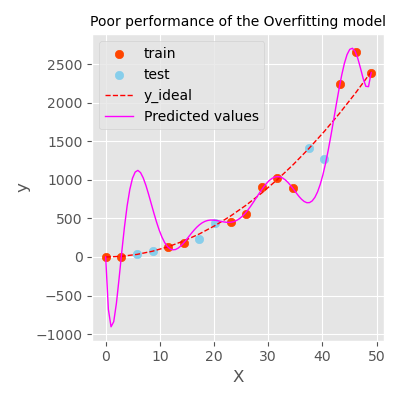

In [13]:
x = np.linspace(0, X.max(), 100)
y_pred = lmodel.predict(x).reshape(-1, 1)
# y_pred = lmodel.predict(X).reshape(-1,1)
# x = np.linspace(0, X.max(), 18)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# fig.canvas.toolbar_visible = False
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = False

ax.scatter(X_train, y_train, c="orangered", label="train")
ax.scatter(X_test, y_test, c="skyblue", label="test")

ax.plot(x_ideal, y_ideal, c="red", label='y_ideal', ls="--", lw=1)
ax.plot(x, y_pred, c="magenta", label="Predicted values", lw=1)

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc="upper left")
ax.set_title("Poor performance of the Overfitting model", fontsize=10)

plt.tight_layout()

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.  

So we will divide the dataset in three parts which are  
| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [14]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

# Split the data 2 times
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=1)

print(f"The shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"The shape of X_cv: {X_cv.shape}, y_cv: {y_cv.shape}")
print(f"The shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

X.shape (40,) y.shape (40,)
The shape of X_train: (24,), y_train: (24,)
The shape of X_cv: (8,), y_cv: (8,)
The shape of X_test: (8,), y_test: (8,)


### Plot Training, Cross Validation and Test Dataset

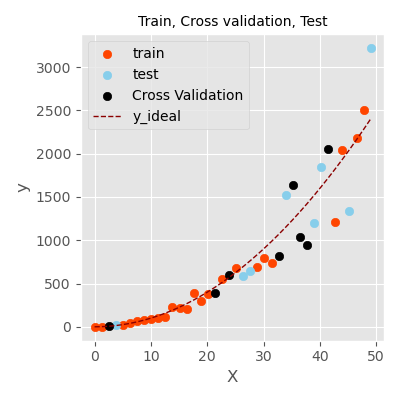

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(X_train, y_train, c="orangered", label="train")
ax.scatter(X_test, y_test, c="skyblue", label="test")
ax.scatter(X_cv, y_cv, c="black", label="Cross Validation")

ax.plot(x_ideal, y_ideal, c="darkred", label='y_ideal', ls="--", lw=1)

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc="upper left")
ax.set_title("Train, Cross validation, Test", fontsize=10)

plt.tight_layout()
plt.show()

### Find the optimal degree for the model

In [16]:
max_degree = 8
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0, X.max(), 100)
y_pred = np.zeros((100, max_degree))

for i in range(max_degree):
    lmodel = lin_model(i + 1)
    lmodel.fit(X_train, y_train)
    err_train[i] = lmodel.mse(y_train, lmodel.predict(X_train))
    err_cv[i] = lmodel.mse(y_cv, lmodel.predict(X_cv))
    y_pred[:, i] = lmodel.predict(x)

optimal_degree = np.argmin(err_cv) + 1
print(f"{optimal_degree} is the best degree for the generalization purpose")

2 is the best degree for the generalization purpose


## Plot the prediction for the every degree

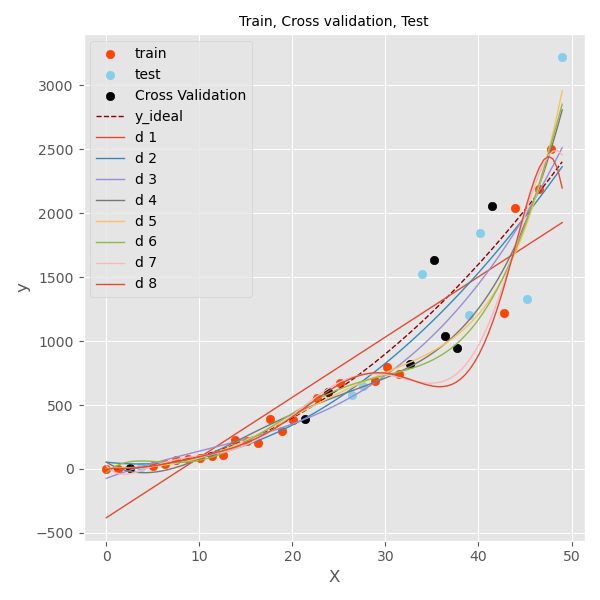

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(X_train, y_train, c="orangered", label="train")
ax.scatter(X_test, y_test, c="skyblue", label="test")
ax.scatter(X_cv, y_cv, c="black", label="Cross Validation")
ax.plot(x_ideal, y_ideal, c="darkred", label='y_ideal', ls="--", lw=1)


for i in range(max_degree):
    ax.plot(x, y_pred[:, i], label=f"d {i + 1}", lw=1)

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(loc="upper left")
ax.set_title("Train, Cross validation, Test", fontsize=10)

plt.tight_layout()
plt.show()

As you can see that degree 2 is the most optimal choice as it goes hand to hand with the ideal values

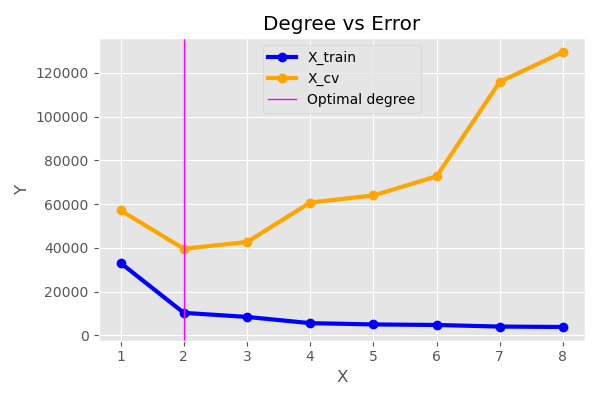

In [18]:
x_axis = list(range(1, 9))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(x_axis, err_train, c="blue", lw=3, marker="o", label="X_train")
ax.plot(x_axis, err_cv, c="orange", lw=3, marker="o", label="X_cv")
ax.axvline(2, label="Optimal degree", lw=1, c="magenta")

ax.legend()
ax.set_title("Degree vs Error")
ax.set_ylabel("Y")
ax.set_xlabel("X")

plt.tight_layout()
plt.show()

We can see from the above plot that as the degree went up the training error decreased but the cross validation error went on incrasing drastically

## Tuning Regularization  
Try different values of the lambda and see which is the optimal value for the model

In [19]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
steps = len(lambda_range)
degree = 10
err_train = np.zeros(steps)
err_cv = np.zeros(steps)
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100, 10))

for i in range(steps):
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_range[i])
    lmodel.fit(X_train, y_train)
    err_train[i] = lmodel.mse(y_train, lmodel.predict(X_train))
    err_cv[i] = lmodel.mse(y_cv, lmodel.predict(X_cv))
    y_pred[:, i] = lmodel.predict(x)

optimal_lambda = np.argmin(err_cv)

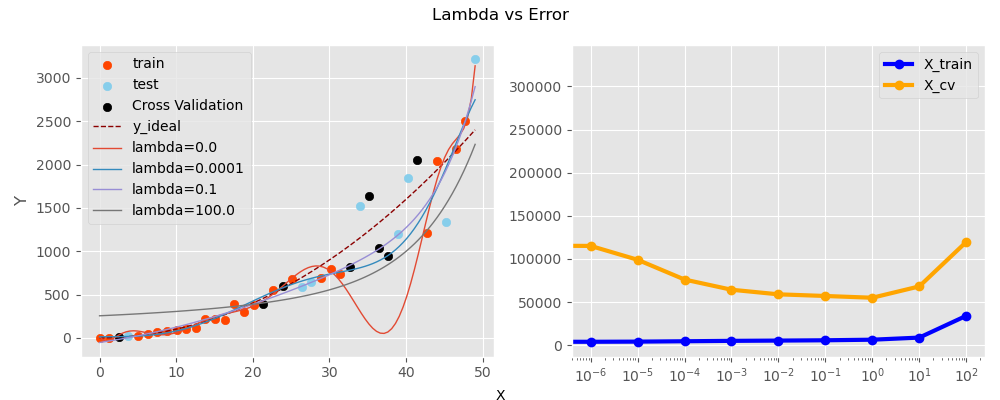

In [20]:
x_axis = list(range(1, len(lambda_range) + 1))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(X_train, y_train, c="orangered", label="train")
ax[0].scatter(X_test, y_test, c="skyblue", label="test")
ax[0].scatter(X_cv, y_cv, c="black", label="Cross Validation")
ax[0].plot(x_ideal, y_ideal, c="darkred", label='y_ideal', ls="--", lw=1)


for i in range(0, steps, 3):
    ax[0].plot(x, y_pred[:, i], label=f"lambda={lambda_range[i]}", lw=1)

ax[1].plot(lambda_range, err_train, c="blue", lw=3, marker="o", label="X_train")
ax[1].plot(lambda_range, err_cv, c="orange", lw=3, marker="o", label="X_cv")
# ax[1].axvline(optimal_lambda, label="Optimal Lambda", lw=1, c="magenta")

ax[0].legend()
ax[1].legend()

ax[1].set_xscale("log")

fig.suptitle("Lambda vs Error")
ax[0].set_ylabel("Y")
fig.text(0.5, 0.0, "X", ha="center")

plt.tight_layout()
plt.show()

#### As we can see that the optimal value of lambda is 1 for this model

## Evlaluating a learning Algorithm (Neural Network)

### Generate the dataset using the make blobs function form the sklearn

In [21]:
from sklearn.datasets import make_blobs

def gen_blobs():
    classes = 6
    m = 800
    std = 0.4
    centers = np.array([[-1, 0], [1, 0], [0, 1], [0, -1],  [-2,1],[-2,-1]])
    X, y = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=2, n_features=2)
    return (X, y, centers, classes, std)

In [22]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


## plot the dataset

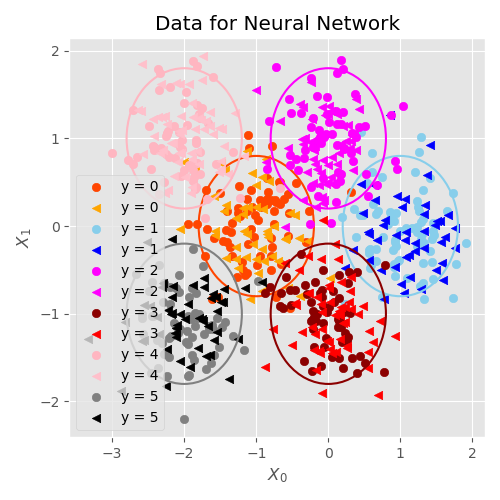

In [23]:
colors = ["orangered", "skyblue", "magenta", "darkred", "lightpink", "grey"]
colors2 = ["orange", "blue", "magenta", "red", "pink", "black"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

css = np.unique(y_train)
for val in css:
    ax.scatter(X_train[:, 0][y_train == val], X_train[:, 1][y_train == val], c=colors[val], marker="o", label=f"y = {val}")
    ax.scatter(X_cv[:, 0][y_cv == val], X_cv[:, 1][y_cv == val], marker="<", c=colors2[val], label=f"y = {val}")
    circ = plt.Circle(centers[val], 2*0.4, color=colors[val], clip_on=False, fill=False, lw=1.5)
    ax.add_patch(circ)

ax.set_title("Data for Neural Network")
ax.set_xlabel("$X_0$")
ax.set_ylabel("$X_1$")    
ax.legend()
plt.tight_layout()
plt.show()

The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>

In [24]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
        if y[i] != yhat[i]:
            incorrect += 1
    err = incorrect / m
    return err

In [25]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


## Model Complexity  
Below we will define two models one simple and one complex and see which one is likely to overfit

## Let's first define the complex model 
- The model will have three layers
- The first layer will have `120 units` with `relu` activation
- The second layer will have `40 units` with `rleu activation
- The third layer will have `6 units` with `linear` activation (not **softmax** for mathamatical computation reason) 

In [26]:
# model = Sequential(
#     [
#         Dense(120, 'relu', name="L1"),
#         Dense(40, 'relu', name="L2"),
#         Dense(6, 'linear', name="L3"),
#     ]
# )

# model.compile(
#     loss = SparseCategoricalCrossentropy(from_logits=True),
#     optimizer = Adam(0.01)
# )

# model.fit(X_train, y_train, epochs=1000)

In [27]:
model.summary()

model_test(model, classes, X_train.shape[1]) 

NameError: name 'model' is not defined

### Let's view the prediction made by the model

In [28]:
colors = ["orangered", "skyblue", "magenta", "darkred", "lightpink", "grey"]
colors2 = ["orange", "blue", "magenta", "red", "pink", "black"]

y_pred = np.argmax(tf.nn.softmax(model.predict(X_train)).numpy(),axis=1)
y_pred_cv = np.argmax(tf.nn.softmax(model.predict(X_cv)).numpy(),axis=1)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

css = np.unique(y_train)
for val in css:
    ax[0, 0].scatter(X_train[:, 0][y_train == val], X_train[:, 1][y_train == val], c=colors[val], marker="o", label=f"y = {val}")
    ax[1, 0].scatter(X_cv[:, 0][y_cv == val], X_cv[:, 1][y_cv == val], marker="<", c=colors2[val], label=f"y = {val}")
    ax[0, 1].scatter(X_train[:, 0][y_pred == val], X_train[:, 1][y_pred == val], c=colors[val], marker="o", label=f"y = {val}")
    ax[1, 1].scatter(X_cv[:, 0][y_pred_cv == val], X_cv[:, 1][y_pred_cv == val], marker="<", c=colors2[val], label=f"y = {val}")

fig.suptitle("Original vs Predicted values of X_train", fontsize=12)
fig.text(0.5, 0.0, "$X_0$")
fig.text(0.0, 0.5, "$X_1$")  

ax[0, 1].legend()
ax[1, 0].legend()

plt.tight_layout()
plt.show()

NameError: name 'model' is not defined

As we can see the model has also predicte the hardest points easily in case of training data, we can hardly find any error. But in case of testing data it didn't performed well, we can esily find the points where the predicted values are not matching the original values

In [ ]:
model_predict =lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

## Simple model
- The model will have three layers
- The first layer will have `6 units` with `relu` activation
- The third layer will have `6 units` with `linear` activation (not **softmax** for mathamatical computation reason) 

In [29]:
model = Sequential(
    [
        Dense(6, 'relu', name="L1"),
        Dense(6, 'linear', name="L2")
    ]
)

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(0.01)
)

model.fit(X_train, y_train, epochs=1000)


Epoch 1/1000

13/13 [==============================] - 0s 1ms/step - loss: 1.6912
Epoch 2/1000
13/13 [==============================] - 0s 943us/step - loss: 1.5139
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.3554
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2116
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0816
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9470
Epoch 7/1000
13/13 [==============================] - 0s 907us/step - loss: 0.8009
Epoch 8/1000
13/13 [==============================] - 0s 927us/step - loss: 0.6577
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5480
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4752
Epoch 11/1000
13/13 [==============================] - 0s 971us/step - loss: 0.4262
Epoch 12/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.3943
Epoch 13/100

In [30]:
model.summary()

model_s_test(model, classes, X_train.shape[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 6)                 18        
                                                                 
 L2 (Dense)                  (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


In [43]:
model_predict =lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, simple model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       simple model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 743us/step
categorization error, training, simple model: 0.490
categorization error, cv,       simple model: 0.519


The simple model have a high cost for Training data and also for the cross validation data, but the corss validation error is less than that of complex model

## Now let's Try regularization for the complex model

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [45]:
model = Sequential(
    [
        Dense(120, 'relu', name="l1", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(40, 'relu', name="l2", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(6, 'linear', name="l3"),
    ]
)

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(0.01)
)

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.4950
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.5668
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.2292
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0254
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9634
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9365
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8466
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8251
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7923
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8424
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8346
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7744
Epoch 13/1000
13/13 [====

In [46]:
model.summary()

model_r_test(model, classes, X_train.shape[1]) 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 120)               360       
                                                                 
 l2 (Dense)                  (None, 40)                4840      
                                                                 
 l3 (Dense)                  (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
ddd
All tests passed!


In [48]:
model_predict =lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex regularized model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex regularized model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 924us/step
categorization error, training, complex regularized model: 0.077
categorization error, cv,       complex regularized model: 0.072


# The perfect model is ready!